In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv(r"https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-23/employed.csv")
df.head()

,industry,major_occupation,minor_occupation,race_gender,industry_total,employ_n,year
0,Agriculture and related,"Management, professional, and related occupations","Management, business, and financial operations...",TOTAL,2349000.0,961000.0,2020
1,Agriculture and related,"Management, professional, and related occupations",Professional and related occupations,TOTAL,2349000.0,58000.0,2020
2,Agriculture and related,Service occupations,Protective service occupations,TOTAL,2349000.0,13000.0,2020
3,Agriculture and related,Service occupations,"Service occupations, except protective",TOTAL,2349000.0,94000.0,2020
4,Agriculture and related,Sales and office occupations,Sales and related occupations,TOTAL,2349000.0,12000.0,2020


In [2]:
df.isna().sum() # Kolon bazlı NA sayıları.Bir sonraki adımda Indusrty kolonuna yakından bakmak istedim.

industry            330
major_occupation      0
minor_occupation      0
race_gender           0
industry_total      660
employ_n            660
year                  0
dtype: int64

In [3]:
df["industry"].unique() # nan, 'Men', 'Women','White', 'Black or African American', 'Asian' --> BUNLAR SEKTÖR DEĞİL. Temizlenmeli.
temizlenecek_veriler=["nan",'Men','Women','White', 'Black or African American', 'Asian']

In [4]:
yeni_df=df.query("industry not in @ temizlenecek_veriler") # İlgisiz verilerden temizlenmiş temiz veriseti oluşturuldu.
yeni_df.isna().sum() # Verilerin temizlendiğini NA veri kalmadığı gözlemlendi.

industry            330
major_occupation      0
minor_occupation      0
race_gender           0
industry_total      330
employ_n            330
year                  0
dtype: int64

# Sektörlerin Ortalama İstihdam Sayısı Karşılaştırması
* İlk amacım hangi sektörün ortalama olarak en fazla istihdam yarattığını bulmak. İzleyen analizlerim en çok istihdam sağlayan sektör üzerinden devam edecektir.

<b> Soru-1 ) Hangi sektör ortalama olarak en fazla istihdam yaratmıştır ?<b>

In [5]:
yeni_df_SektörTipi=yeni_df.groupby("industry").agg({"employ_n":"mean"}).sort_values(by="employ_n",ascending=False).reset_index()
yeni_df_SektörTipi.head() 
# Veri seti sektör tiplerine göre gruplandırıldı.
#İstihdam sayıları ortalamasına göre büyükten küçüğe doğru sıralandı.

,industry,employ_n
0,Education and health services,1.556003e+06
1,Wholesale and retail trade,8.968308e+05
2,Professional and business services,8.395051e+05
3,Retail trade,7.357323e+05
4,Manufacturing,6.901237e+05


Text(0.5, 1.0, '2015-2020 Yılları Arası Sektörlere Göre Ortalama İstihdam Sayısı')

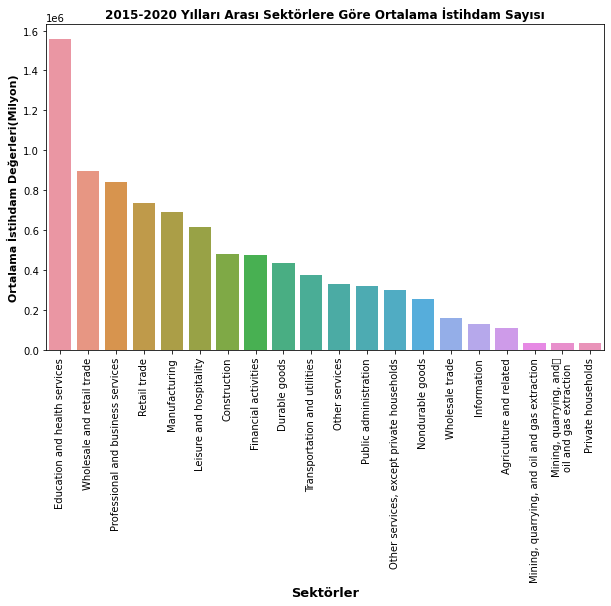

In [6]:
import seaborn as sns
import warnings
fig,ax=plt.subplots(figsize=(10,6))
warnings.filterwarnings("ignore")
cubuklar=sns.barplot(x="industry",y="employ_n",data=yeni_df_SektörTipi)
plt.xticks(rotation=90)
plt.ylabel("Ortalama İstihdam Değerleri(Milyon)",fontsize=11,weight="bold")
plt.xlabel("Sektörler",fontsize=13,weight="bold")
plt.title("2015-2020 Yılları Arası Sektörlere Göre Ortalama İstihdam Sayısı",weight="bold")

* En çok istihdam sağlayan sektörün <b>"Education and health services<b>" olduğu gözlenmiştir.
    
<b>Soru-2 ) İlgili sektörün istihdam trendi yıl bazında nasıl değişmiştir?<b>

In [7]:
df_EducationAndHealthServices=yeni_df.query("industry =='Education and health services'")
df_EducationAndHealthServices.head() # Temizlenmiş ana veriseti sektör adı 'Education and health services' a göre filtrelendi.

,industry,major_occupation,minor_occupation,race_gender,industry_total,employ_n,year
143,Education and health services,"Management, professional, and related occupations","Management, business, and financial operations...",TOTAL,34105000.0,3693000.0,2020
144,Education and health services,"Management, professional, and related occupations",Professional and related occupations,TOTAL,34105000.0,19540000.0,2020
145,Education and health services,Service occupations,Protective service occupations,TOTAL,34105000.0,179000.0,2020
146,Education and health services,Service occupations,"Service occupations, except protective",TOTAL,34105000.0,6495000.0,2020
147,Education and health services,Sales and office occupations,Sales and related occupations,TOTAL,34105000.0,138000.0,2020


In [8]:
df_SektorTrendi=df_EducationAndHealthServices.groupby("year")["employ_n"].sum().reset_index()
df_SektorTrendi.head() # df_EducationAndHealthServices veri seti toplam istihdam sayısına  göre yıl bazlı gruplandırıldı.

,year,employ_n
0,2015,100071000.0
1,2016,101812000.0
2,2017,102456000.0
3,2018,104085000.0
4,2019,106541000.0


Text(0, 0.5, 'Ortalama İstihdam Sayısı')

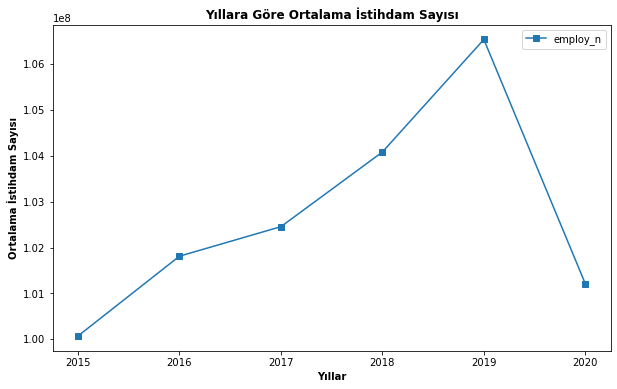

In [9]:
fig,ax=plt.subplots(figsize=(10,6))
df_SektorTrendi.plot(x="year",y="employ_n",marker="s",ax=ax) # Yıl bazlı trend
plt.title("Yıllara Göre Ortalama İstihdam Sayısı",weight="bold")
plt.xlabel("Yıllar",weight="bold")
plt.ylabel("Ortalama İstihdam Sayısı",weight="bold")

* İlgili sektörde toplam çalışan sayısının Irk-Cinsiyete göre Sayıları

Grafik Yorumlaması: 
'Education and Health Services' sektöründe istihdam sayısı 2019'a kadar sürekli artış göstermişken, 2019'da ani bir düşüş olduğu gözlemlenmiştir. Bu noktada ilgili sektörle bağlantılı olan "ana iş" (major_occupation) kollarındaki trend yıl bazlı nasıl değiştiğini gözlemlemek faydalı olacaktır.

<b>Soru-3 ) Ana iş kollarındaki(major_occupation) trend yıl bazlı nasıl değişmiştir? 2019'da benzer şekilde alt ana iş kollarında da düşüş gerçekleşmiş midir?<b>
    
    * İlgili analizi yapmak için verisetinden index'i yılların oluşturduğu ,sütunları ise "major_occupation" varilerinin oluşturduğu ortalama istihdam sayısına göre pivot tablosu oluşturuldu.
    * Oluşturulan pivot tablosu kullanılarak çizgi grafik üzerinde trend incelemesi yapıldı.
    * Yıllar içerisindeki dağılım ek olarak çubuk grafik çizerek gözlemlendi.
    

In [10]:
pt=df_EducationAndHealthServices.pivot_table(index="year",columns="major_occupation",values="employ_n",aggfunc="mean").round(3)
pt

major_occupation,"Management, professional, and related occupations","Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations",Sales and office occupations,Service occupations
year,,,,,
2015,5434333.333,53277.778,137250.000,910166.667,1777583.333
2016,5496333.333,49000.000,138666.667,907750.000,1868083.333
2017,5605333.333,47555.556,147833.333,899083.333,1814416.667
2018,5720416.667,49111.111,148583.333,898750.000,1832333.333
2019,5904000.000,50055.556,147416.667,904166.667,1847750.000
2020,5749916.667,47166.667,128000.000,839083.333,1646583.333


Text(0, 0.5, 'Ortalama İstihdam Sayıları (Milyon)')

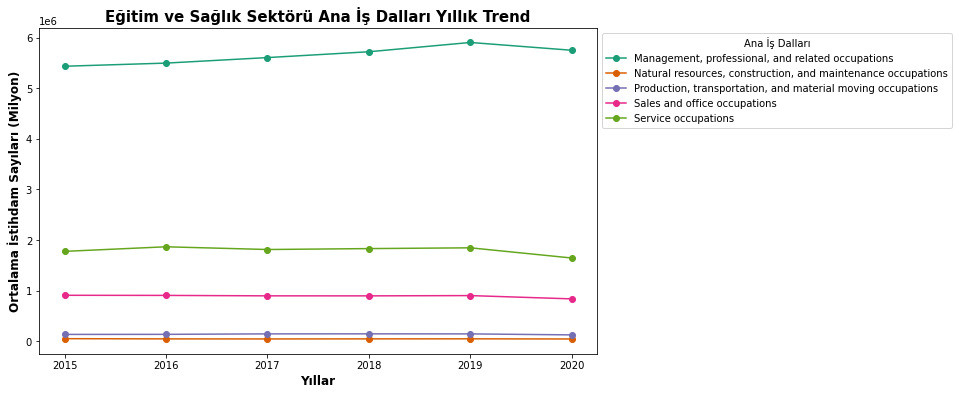

In [11]:
from matplotlib import cm
fig,ax=plt.subplots(figsize=(10,6))
ax.set_prop_cycle(color=cm.Dark2(range(10)))
lines=ax.plot(pt,marker="o")
ax.legend(handles=lines,labels=pt.columns.to_list(),bbox_to_anchor=(1,1),frameon=True,title="Ana İş Dalları")
plt.title("Eğitim ve Sağlık Sektörü Ana İş Dalları Yıllık Trend",weight="bold",fontsize=15)
plt.xlabel("Yıllar",weight="bold",fontsize=12)
plt.ylabel("Ortalama İstihdam Sayıları (Milyon)",weight="bold",fontsize=12)

Text(0, 0.5, 'Ortalama İstihdam Sayıları (Milyon)')

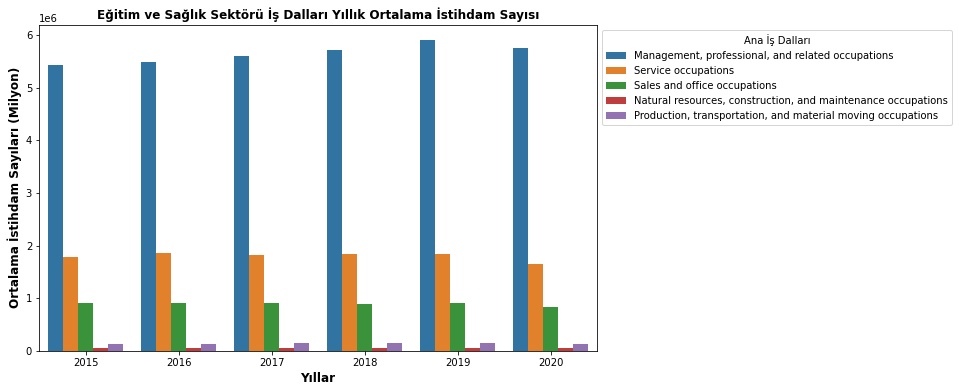

In [12]:

fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x="year",y="employ_n",hue="major_occupation",estimator=np.mean,ci=None,data=df_EducationAndHealthServices)
ax.legend(bbox_to_anchor=(1,1),title=("Ana İş Dalları"))
plt.title("Eğitim ve Sağlık Sektörü İş Dalları Yıllık Ortalama İstihdam Sayısı",weight="bold")
plt.xlabel("Yıllar",weight="bold",fontsize=12)
plt.ylabel("Ortalama İstihdam Sayıları (Milyon)",weight="bold",fontsize=12)


* Ana sektör olarak 2019-2020 yıllarında sert düşüş gösteren Eğitim ve Sağlık Sektörü alt bileşenlerini incelediğimiz zaman , ilgili alt ana iş dallarında  da 2019-2020 yılları arasında ortalama istihdamında düşüş gözlenmiştir.

* Trend olarak ise Ana sektör olan "Eğitim ve Sağlık Sektörü" ile ayrışan alt ana sektörler olduğu görülmektedir.

* "Management,professional,and related occupations" , "Eğitim ve Sağlık Sektörü" ile aynı trende sahipken(2019'a kadar artış, 2019'dan sonra düşüş) , bazı alt ana sektörlerin trendinin (örn : "Sales and Office Occupations") "Eğitim ve Sağlık Sektörü" ile aynı trende sahip olmadığı görülmektedir.

<b>Soru-4 ) Alt ana iş dallarından 2019-2020 yılları arasında düşüş gerçekleştiği gözlemlenmiştir. Bu anlamda, yüzdesel olarak en çok küçülen sektör/sektörler hangisidir/hangileridir?<b>

In [13]:
df_Oransal=df_EducationAndHealthServices.pivot_table(index="year",columns="major_occupation",values="employ_n",aggfunc="sum")

In [14]:
pt_percentage=(df_Oransal.pct_change()*100) # Bir önceki yıla göre alt ana sektörlerin yıl bazında yüzdesek artış/azalışını hesaplar

In [15]:
pt_percentage=pt_percentage.reset_index().rename_axis(None, axis='columns') #Index resetleme işlemleri yapıldı
pt_percentage

,year,"Management, professional, and related occupations","Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations",Sales and office occupations,Service occupations
0,2015,NaN,NaN,NaN,NaN,NaN
1,2016,1.140894,-8.029197,1.032180,-0.265519,5.091182
2,2017,1.983140,-2.947846,6.610577,-0.954742,-2.872820
3,2018,2.053104,3.271028,0.507328,-0.037075,0.987462
4,2019,3.209265,1.923077,-0.785193,0.602689,0.841368
5,2020,-2.609813,-5.771365,-13.171283,-7.198157,-10.887115


In [16]:
pt_percentage_melted=pt_percentage.melt(id_vars="year",var_name="major_occupation",value_name="YüzdeselKüçülme") # Tidy Data düzeltme işlemleri yapıldı
pt_percentage_melted.head()

,year,major_occupation,YüzdeselKüçülme
0,2015,"Management, professional, and related occupations",NaN
1,2016,"Management, professional, and related occupations",1.140894
2,2017,"Management, professional, and related occupations",1.983140
3,2018,"Management, professional, and related occupations",2.053104
4,2019,"Management, professional, and related occupations",3.209265


In [17]:
filt=(pt_percentage_melted["year"]==2015) 
# Yüzdesel olarak 2015 değerlerinden önce bir yıl olmadığı için 2015 değerleri NaN olacaktır(2014-2015 arası yüzdesel değişim hesaplanamaz çünkü 2014 değeri veride bulunmamaktadır).
#Bu nedenle 2015 verileri seçilerek bir sonraki adımda verisetinden ayıklandı.

In [18]:
pt_percentage_filted=pt_percentage_melted[~filt]

Text(0.5, 0, 'Yıllar')

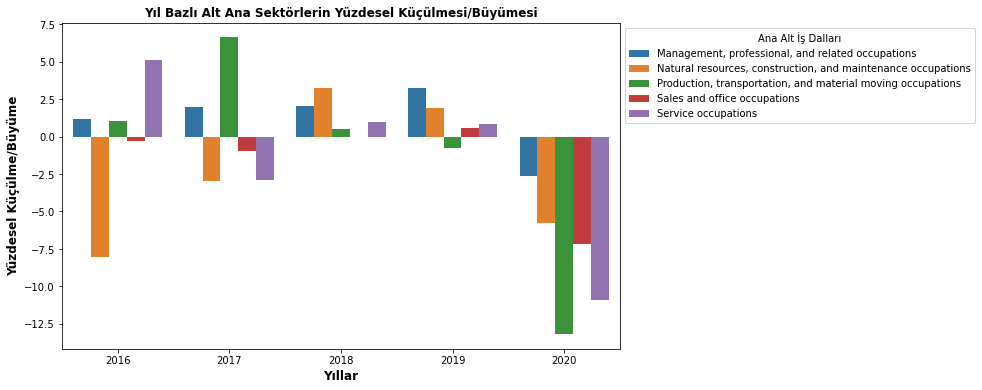

In [19]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x="year",y="YüzdeselKüçülme",hue="major_occupation",data=pt_percentage_filted)
plt.legend(bbox_to_anchor=(1,1),title="Ana Alt İş Dalları")
plt.title("Yıl Bazlı Alt Ana Sektörlerin Yüzdesel Küçülmesi/Büyümesi",weight="bold",fontsize=12)
plt.ylabel("Yüzdesel Küçülme/Büyüme",weight="bold",fontsize=12)
plt.xlabel("Yıllar",weight="bold",fontsize=12)

SONUÇ: 
* Alt ana sektörlere baktığımız zaman 2020 yılında bir önceki yıla göre en çok küçülen sektör yaklaşık %13 küçülmeyle "Production,transportation,and material moving occupations" olduğu görülmektedir. En az küçülen sektör ise yaklaşık %3 ile "Management, professional,and related occupations" olmuştur.
* Küçülme/Büyüme tablosu yukarda elde ettiğimiz trend çizgilerini ve çubuk grafiğini desteklemektedir. İlgili tablodan görüleceği üzere "Management ,professional,and related occupations" alt ana sektörü 2016-2017-2018 yıllarında büyürken 2019'da küçülerek ana iş sektörü olan "Eğitim ve Sağlık Sektörü" ile aynı trende sahip olduğu görülmektedir. "Service Occupation" ve "Sales and office occupations" alt ana sektörlernin ise yıllara göre dalgalı bir yapı içerisinde olduğu görülmektedir. 

<b>2. VERİSETİNİN İNCELENMESİ<b>

In [20]:
df_weekly_earn=pd.read_csv(r"https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-23/earn.csv")
df_weekly_earn.head()

,sex,race,ethnic_origin,age,year,quarter,n_persons,median_weekly_earn
0,Both Sexes,All Races,All Origins,16 years and over,2010,1,96821000,754
1,Both Sexes,All Races,All Origins,16 years and over,2010,2,99798000,740
2,Both Sexes,All Races,All Origins,16 years and over,2010,3,101385000,740
3,Both Sexes,All Races,All Origins,16 years and over,2010,4,100120000,752
4,Both Sexes,All Races,All Origins,16 years and over,2011,1,98329000,755


In [24]:
df_weekly_earn.isna().sum() #  NA barındıran herhangi bir sütun bulunmamktadır.

sex                   0
race                  0
ethnic_origin         0
age                   0
year                  0
quarter               0
n_persons             0
median_weekly_earn    0
dtype: int64

In [25]:
df_weekly_earn.nunique() 
#Sütunlarda yer alan veri çeşidi sayısı. İlgili sütunların categorical-nominal-ordinal olup olmadığı incelenecek.

sex                      3
race                     4
ethnic_origin            2
age                     12
year                    11
quarter                  4
n_persons             3799
median_weekly_earn     915
dtype: int64

Bir önceki verisetinin son iki sorusunda 2019-2020 yılları arasında düşüşe yakından bakıp, ilgili düşüşün sektörler üzerinde yüzdesel olarak sektör daralmasına ne kadar etki ettiğine cevap aramıştım. Bu veri setinde ise bütün  çalışanların haftalık kazancının her yılın ilk 4 çeyreğinde nasıl değiştine cevap arayıp, benzer şekilde 2020 yılında düşüş yaşanmasına rağmen acaba haftalık gelirlerde 2020'nin bütün çeyreğinde düşüp /düşmediği incelenecektir.Bu anlamda :

<b>Soru-5) Haftalık gelirler yıl-çeyrek bazlı nasıl değişmektedir ? 2020 yılının 4 çeyreğinde de düşüş gözlemlenmiş midir?<b>

In [26]:
pt_weekly_earn=df_weekly_earn.pivot_table(index="year",columns="quarter",values="median_weekly_earn",aggfunc="median").round(-1)
pt_weekly_earn # Her yılın ilk 4 çeyreği için median haftalık kazanç değerleri pivot tablosu(pt) haline getirilmiştir. 

quarter,1,2,3,4
year,,,,
2010,680.0,680.0,670.0,680.0
2011,700.0,700.0,690.0,700.0
2012,710.0,720.0,690.0,710.0
2013,710.0,720.0,720.0,720.0
2014,740.0,730.0,740.0,750.0
2015,740.0,740.0,740.0,740.0
2016,760.0,770.0,760.0,770.0
2017,780.0,790.0,790.0,770.0
2018,790.0,810.0,780.0,830.0


Text(0, 0.5, 'Haftalık Kazanç($)')

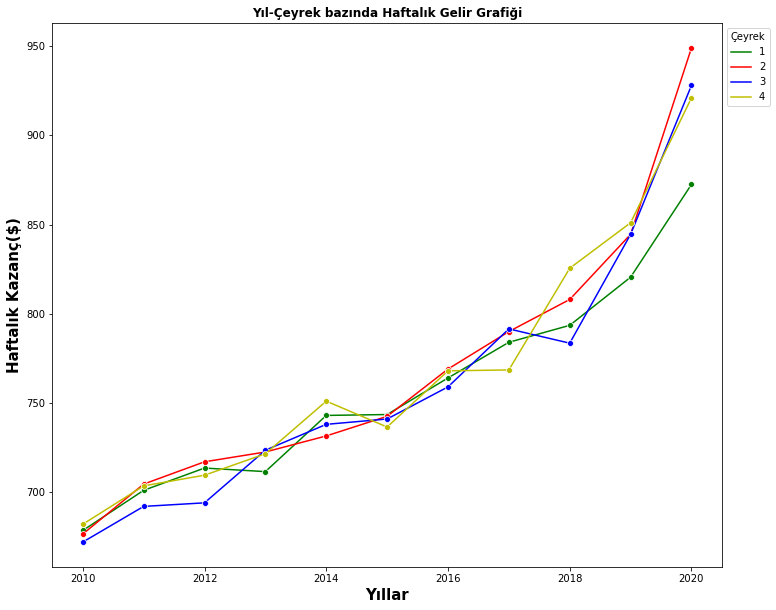

In [27]:
fig,ax=plt.subplots(figsize=(12,10))
sns.lineplot(x="year",y="median_weekly_earn",hue="quarter",data=df_weekly_earn,ci=None,palette=["g","r","b","y"],estimator=np.median,marker="o")
ax.legend(bbox_to_anchor=(1,1),title="Çeyrek")
plt.title("Yıl-Çeyrek bazında Haftalık Gelir Grafiği",weight="bold")
plt.xlabel("Yıllar",fontsize=15,weight="bold")
plt.ylabel("Haftalık Kazanç($)",fontsize=15,weight="bold")

İlk veri setinde 2020 yılında en fazla istihdamı sağlayan "Education and health services" sektörünün istihdam sayısında ciddi bir düşüş olduğunu görmüştük. Bu analizimize bakarak ilgili düşüşün 2020'nin 2. çeyreğinden sonra başladığı sonucu çıkarılabilir. Grafikte 2020 yılına bakacak olursak ilk çeyrekte 870 Dolar olan haftalık kazanç aynı yılın 2. çeyreğinde 950 dolara çıkmakta ve izleyen çeyreklerde ise düşmektedir. Bu sonuc muhtemelen COVID-19 salgınıyla yakından ilişkilidir. COVID-19 salgını da ABD'de 2020'nin 2.çeyreğinden sonra etkisini hissettirmeye başlamıştır.

Elimizdeki haftalıık gelir verisetine dayanarak çeyrek bazda haftalık gelirlerin nasıl değiştiğine baktık. Şimdi ise sırasıyla aşağıda yer alan sorulara cevap arayacağız.
 * <b>Soru-6) Haftalık gelirlerin cinsiyetle bir ilişkisi var mı?<b>

In [28]:
df_pt_sex=df_weekly_earn.pivot_table(index="year",columns="sex",values="median_weekly_earn",aggfunc="median").round(-1)
df_pt_sex # Cinsiyete göre yıl bazında haftalık kazanc medyanın yer aldığı pivot tablosu oluşturduk

sex,Both Sexes,Men,Women
year,,,
2010,680.0,770.0,640.0
2011,710.0,750.0,660.0
2012,720.0,790.0,660.0
2013,740.0,830.0,680.0
2014,780.0,850.0,710.0
2015,770.0,840.0,700.0
2016,800.0,880.0,730.0
2017,820.0,910.0,740.0
2018,840.0,930.0,760.0


Text(0, 0.5, 'Haftalık Gelir($)')

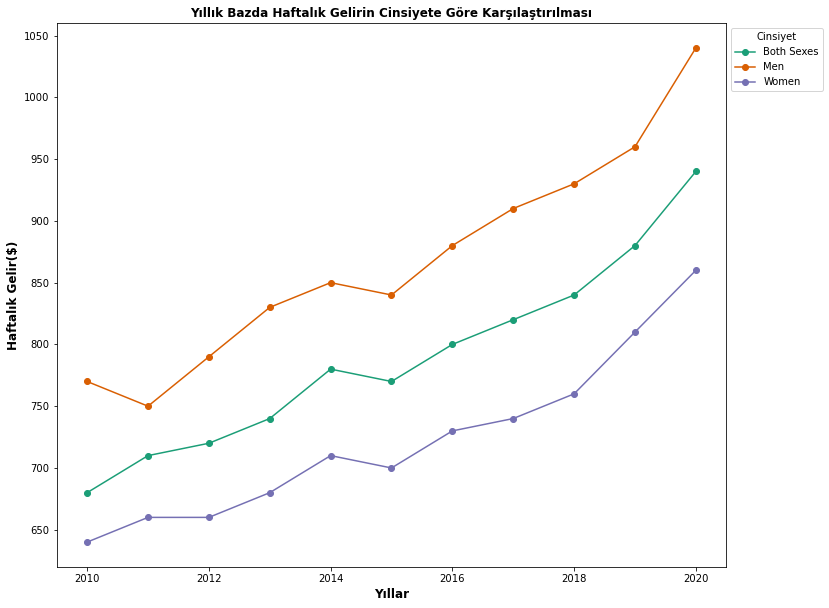

In [29]:
fig,ax=plt.subplots(figsize=(12,10))
ax.set_prop_cycle(color=cm.Dark2(range(10)))
lines=ax.plot(df_pt_sex,marker="o")
ax.legend(handles=lines,labels=df_pt_sex.columns.to_list(),bbox_to_anchor=(1,1),frameon=True,title="Cinsiyet")
plt.title("Yıllık Bazda Haftalık Gelirin Cinsiyete Göre Karşılaştırılması",weight="bold",fontsize=12)
plt.xlabel("Yıllar",weight="bold",fontsize=12)
plt.ylabel("Haftalık Gelir($)",weight="bold",fontsize=12)

* Bütün yıllarda Erkeklerin haftalık gelirinin kadınların haftalık gelirinden yüksek olduğu gözlemlenmiştir. Cinsiyetin haftalık gelir üzerinde  etkisi olduğu söylenebilir. Bir sonraki sorumuz ise her bir cinsiyet için o cinsiyete sahip olan bireyin ırkının haftalık gelirle ilişkisi olup olmadığının araştırılmasıdır

 * <b>Soru-7) Her bir cinsiyet için ilgili cinsiyete ait olan bireyin ırkının haftalık gelirle ilişkisi var mı?<b>


Text(0, 0.5, 'Haftalık Gelir($)')

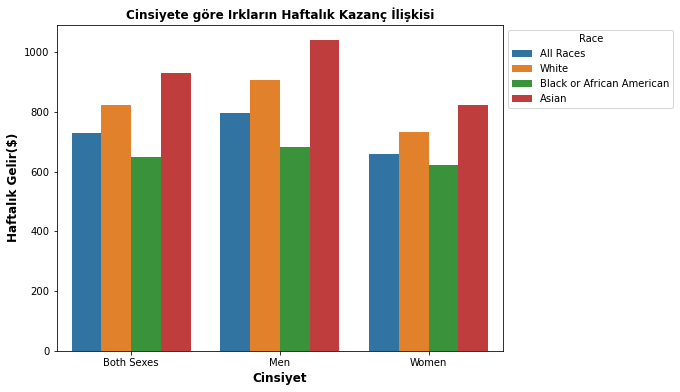

In [30]:
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(x="sex",y="median_weekly_earn",hue="race",data=df_weekly_earn,ci=None,ax=ax)
ax.legend(bbox_to_anchor=(1,1),title="Race")
ax.set_title("Cinsiyete göre Irkların Haftalık Kazanç İlişkisi",weight="bold",fontsize=12)
plt.xlabel("Cinsiyet",weight="bold",fontsize=12)
plt.ylabel("Haftalık Gelir($)",weight="bold",fontsize=12)

 * İlgili çubuk grafik incelendiği zaman cinsiyetten bağımsız olarak ırkın haftalık kazançla ilişkisi olduğu görülmektedir. Çalışan hangi cinsiyetten olursa olsun, Asyalılar en yüksek haftalık kazancı elde etmektedirler. Asyalıları sırasıyla Beyazlar ve Siyah-Afrikalı Amerikalılar izlemektedir. Bu analizden sonra araştırılacak nokta ise bu birelerin etnik köken farklılıklarının haftalık kazançla ilişkisinin olup olmadığıdır.
 
 
 
  * <b>Soru-8) Her bir cinsiyet için etnik köken farklılıklarının haftalık gelirle ilişkisi var mı?<b>
 

Text(0, 0.5, 'Haftalık Gelir($)')

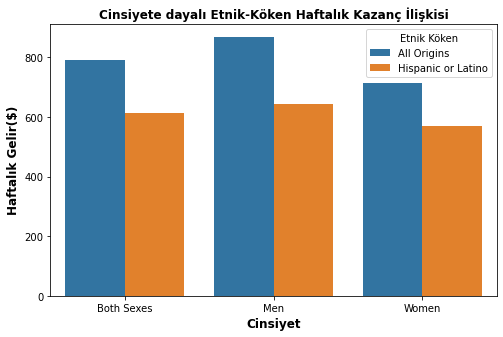

In [31]:
fig,ax=plt.subplots(figsize=(8,5))
sns.barplot(x="sex",y="median_weekly_earn",hue="ethnic_origin",data=df_weekly_earn,ci=None,ax=ax)
ax.legend(bbox_to_anchor=(1,1),title="Etnik Köken")
ax.set_title("Cinsiyete dayalı Etnik-Köken Haftalık Kazanç İlişkisi",weight="bold",fontsize=12)
plt.xlabel("Cinsiyet",weight="bold",fontsize=12)
plt.ylabel("Haftalık Gelir($)",weight="bold",fontsize=12)

Grafik Yorum : Grafikten gözlenebileceği üzere cinsiyetten bağımsız olarak "Hispanic or Latino" etnik kökene sahip olanlar diğer etnik kökene sahip olan insanların haftalık ortalama kazancından daha az kazandığı gözükmektedir.
* "Hispanic or Latino" etnik kökenine sahip olanlar  en düşük haftalık kazanca sahiptirler çıkarımını yapmak eldeki verilere göre doğru değildir. "All Origins" içerisinde "Hispanic or Latino" etnik kökenine sahip insanlardan haftalık olarak daha az kazanca sahip olan insanlar olabileceği gibi, haftalık kazancı "Hispanic or Latino" etnik kökenine sahip insanlardan çok daha yüksek etnik kökene sahip insanlarda olabilir.